# Intro to Pipeline

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/pipe.png" width="1200">



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = 10*np.random.normal(0,1,70)
y_train = 10*(-X_train**2) + np.random.normal(-100,100,70)

X_train = X_train.reshape(-1,1)
X_train.shape

(70, 1)

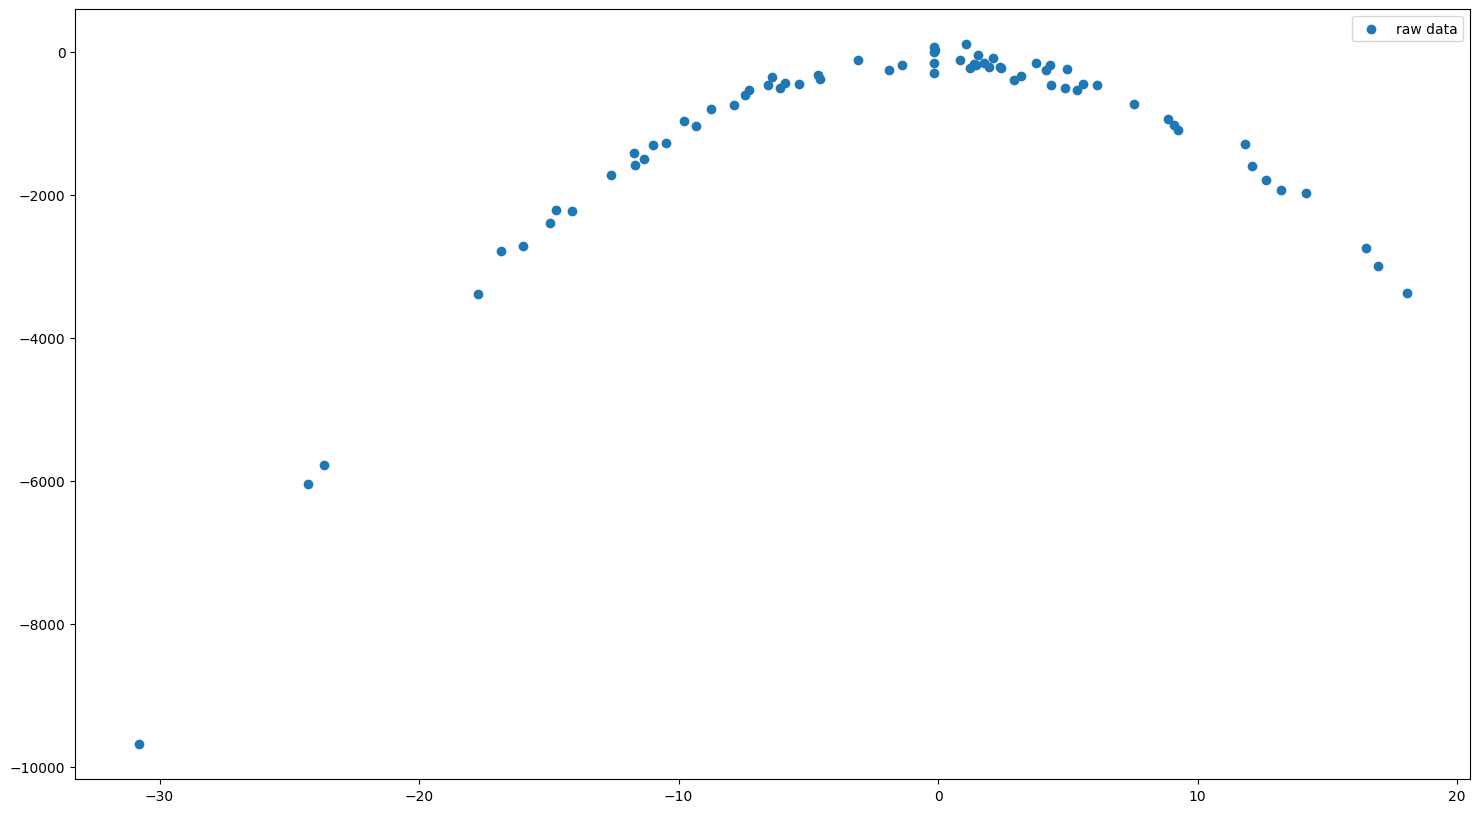

In [3]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.legend();

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)  # always target must be ndim==2!!!

X_test = np.linspace(-30,30,100).reshape(-1,1)

#Prediction
y_pred = lr.predict(X_test)

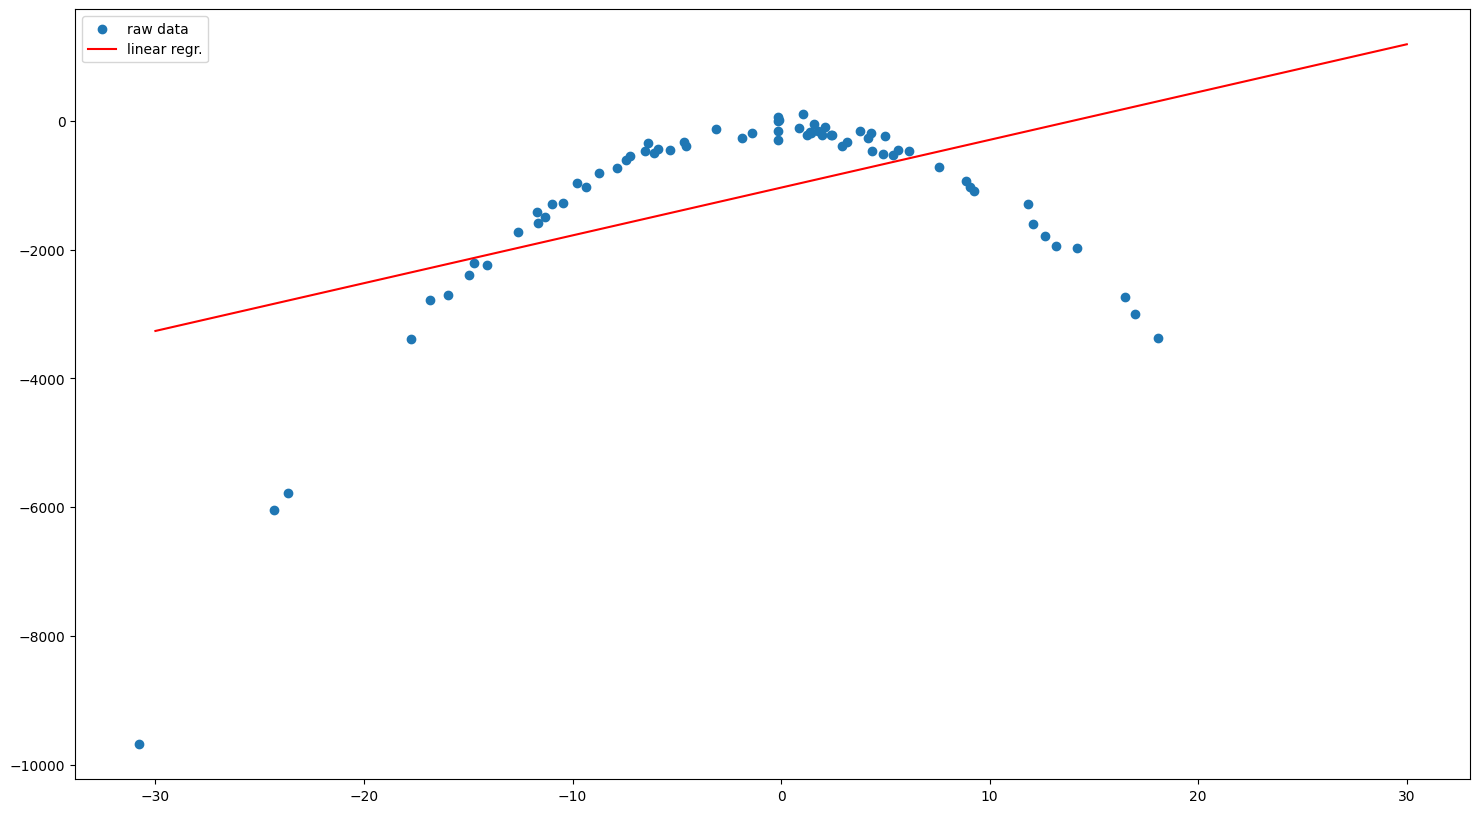

In [5]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.plot(X_test,y_pred, color='red',label="linear regr.");
plt.legend();

## PolynomialFeatures
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

PolynomialFeatures is a class in scikit-learn (sklearn) that is used for feature engineering in machine learning. It generates polynomial features by transforming an input data matrix into a new one that includes all polynomial combinations of the features with a specified degree.
In this example, X is the original feature matrix, and X_poly is the transformed matrix that includes not only the original features but also their combinations up to the specified degree. The degree parameter determines the maximum degree of the polynomial features to be generated.


X = [[a, b],
     [c, d]]
X_poly = [[1, a, b, a^2, ab, b^2],
          [1, c, d, c^2, cd, d^2]]

In [6]:
X = np.array([[2, 4],
              [6, 7]])
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures with the desired degree
poly = PolynomialFeatures(degree=2)

# Transform the input data to include polynomial features
X_poly = poly.fit_transform(X)
X_poly


array([[ 1.,  2.,  4.,  4.,  8., 16.],
       [ 1.,  6.,  7., 36., 42., 49.]])

In [7]:
## Using Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline ([
                  ('transform_data',PolynomialFeatures(degree=2)),
                  ('estimator',LinearRegression()),
                  ])

pipe.fit(X_train,y_train)  # always target must be ndim==2!!!

#pipeline Prediction
poly_pred = pipe.predict(X_test)

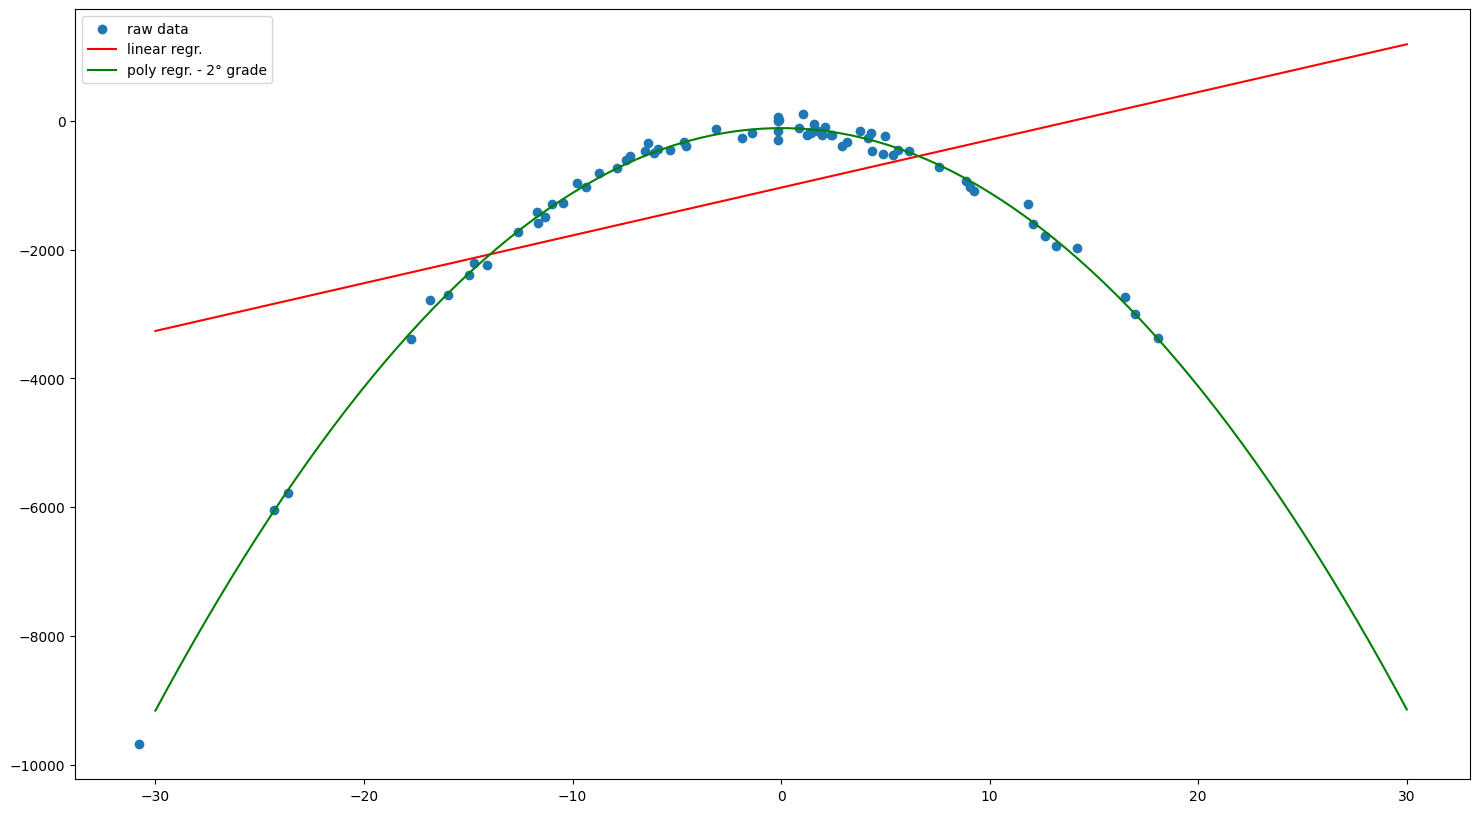

In [8]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.plot(X_test,y_pred, color='red',label="linear regr.");
plt.plot(X_test,poly_pred, color='green',label="poly regr. - 2° grade");
plt.legend();

## PolynomialFeatures Iterators

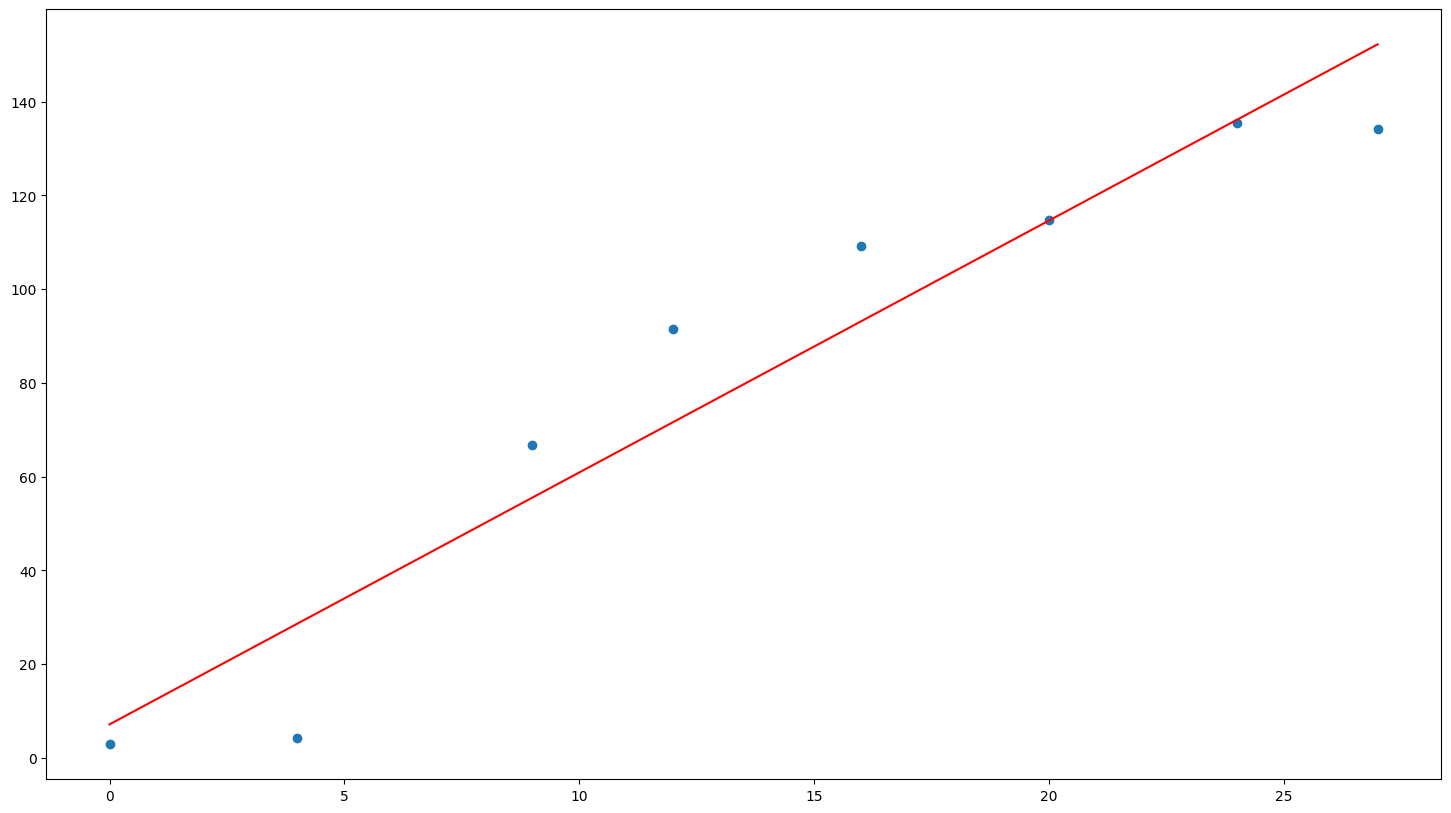

In [9]:
x = np.array([0., 4., 9., 12., 16., 20., 24., 27.])
y = np.array([2.9,4.3,66.7,91.4,109.2,114.8,135.5,134.2])

lr = LinearRegression()
x = x.reshape(-1,1)
lr.fit(x,y)  # always target must be ndim==2!!!

#Prediction
y_pred = lr.predict(x)

plt.figure(figsize=(18,10))
plt.scatter(x, y, label="sample data");
plt.plot(x, y_pred,'-r');

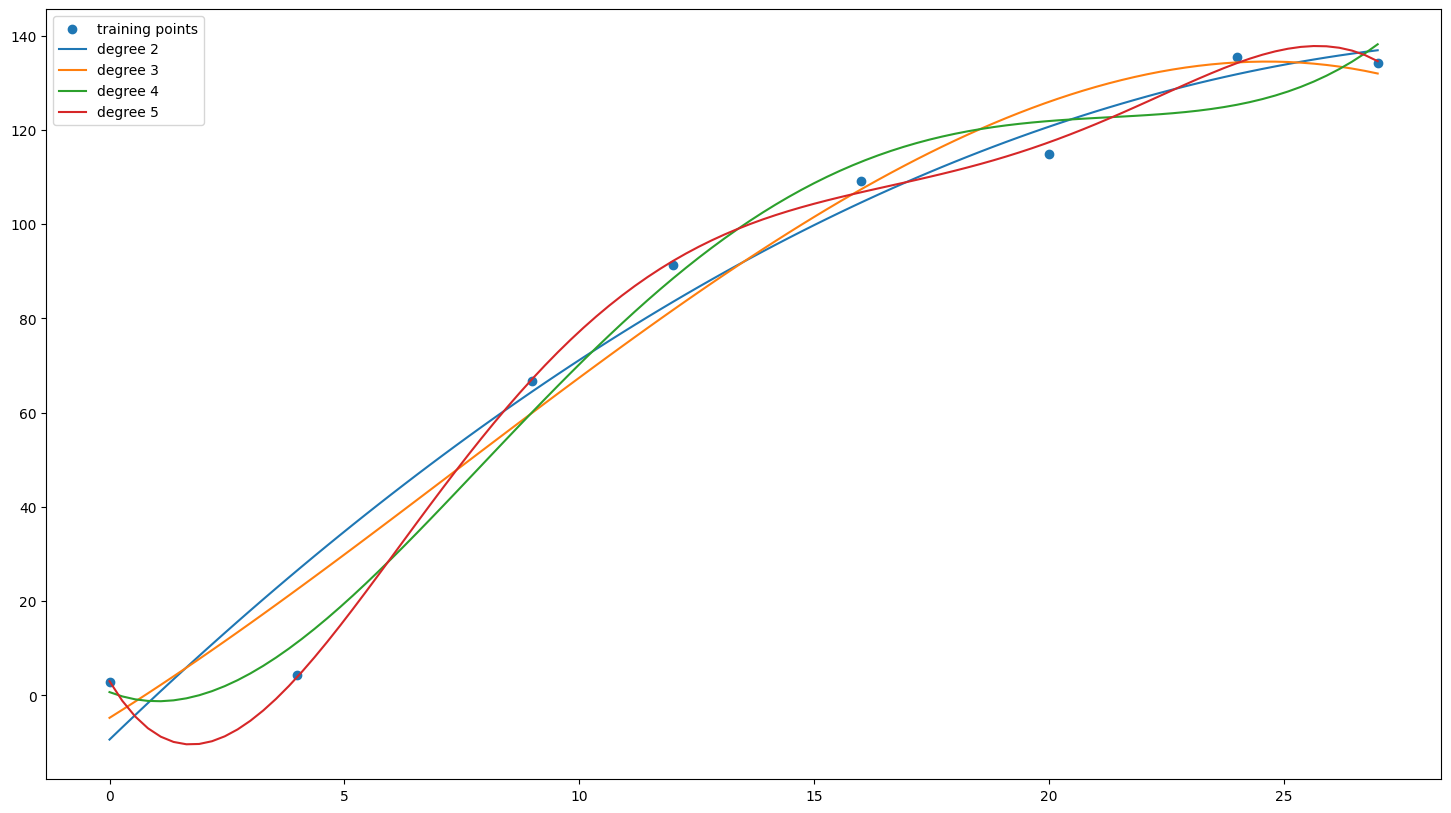

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.array([0., 4., 9., 12., 16., 20., 24., 27.])
y = np.array([2.9,4.3,66.7,91.4,109.2,114.8,135.5,134.2])

x_plot = np.linspace(0, max(x), 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]            # equal to .reshape(-1,1)
X_plot = x_plot[:, np.newaxis]  # equal to .reshape(-1,1)

plt.figure(figsize=(18,10))
plt.scatter(x, y, label="training points")

for degree in np.arange(2, 6, 1):
    model = make_pipeline(PolynomialFeatures(degree),
                          LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc=2);

##Pipeline Classification KBest

## Pipeline in production

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=548,
                       n_features=32,
                       noise=47,
                       random_state=667
                       )

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
pca = PCA()
model = LinearRegression()

# sempre normalizzare prima della PCA
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.predict(X)

array([ 2.82917538e+02,  3.74318820e+02,  2.97877719e+02,  1.70260292e+02,
        2.13655511e+01, -2.86822882e+02,  1.65615802e+02, -4.37809540e+01,
       -5.04928786e+02,  1.43743467e+02,  1.71004611e+02,  7.89908960e+01,
       -1.02448556e+01,  2.10682716e+02,  1.08413631e+02,  1.91917547e+02,
       -1.14980010e+02, -3.41691079e+02, -1.56115458e+02, -4.64066815e+01,
       -1.11770792e+02, -9.13495112e+00,  8.10107721e+01, -3.77528602e+02,
       -2.77421300e+02, -3.09411226e+01, -5.90843104e+01,  2.21494904e+02,
       -1.20559441e+02,  9.14274174e+01, -2.25929153e+01,  4.84858520e+01,
       -1.11320824e+02,  4.26686021e+01, -8.69955673e+01,  5.18524373e+00,
        1.31050321e+02, -7.43592807e+01, -4.84687816e+01, -2.38008368e+02,
        1.48364014e+02, -4.02424984e+01, -3.46802966e+02, -2.15761628e+02,
        1.59750154e+01, -3.03622007e+02,  1.65936214e+02,  3.14435155e+02,
        1.96248714e+02,  2.00754245e+02,  4.79841058e+02, -1.78985518e+02,
        2.15712961e+02, -

In [14]:
cross_val_score(model, X, y, cv=5) #R^2

array([0.948516  , 0.94074421, 0.95424128, 0.94523144, 0.94630438])

In [15]:
## Problema per usare questo modello dobbiamo sempre standardizzare i dati e la PCA... non così semplice

### The pipeline we are going to setup is composed of the following tasks:

- Data Normalization: in this tutorial we have selected three different normalization methods, including the QuantileTransformer (check out the documentation)..
- Dimensionality Reduction: we selected Principal Component Analysis (PCA) and a univariate feature selection algorithm as possible candidates.
- Regression: we apply a simple regularized linear method, although the method is easily extendable to other learning algorithms.

In [16]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pca = PCA()
#model = LinearRegression()
#model = DecisionTreeRegressor(max_depth = 1)

pipe = Pipeline([
                ('scaler', scaler),# primo passaggio
                ('reduce_dim', pca),# secondo passaggio
                ('regressor', model)
                ])

pipe = pipe.fit(X_train, y_train)

In [17]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('reduce_dim', PCA()),
                ('regressor', LinearRegression())])

In [18]:
cross_val_score(pipe, X, y, cv=5)

array([0.948516  , 0.94074421, 0.95424128, 0.94523144, 0.94630438])

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/easy.png" width="600">